# motecarlo Demo 


In [94]:
import matplotlib.pyplot as plt
import random
from montecarlo import *


# Scenario 1: A 2-headed coin

### 1. Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1

In [2]:
fair_coin = Die(['H','T'])
unfair_coin = Die(['H','T'])
unfair_coin.change_w('T',5)

In [3]:
unfair_coin._die_df

,face,weight
0,H,1.0
1,T,5.0


### 2. Play a game of 1000 flips of three coins with all fair dice.

In [4]:
game1 = Game([fair_coin,fair_coin,fair_coin])
nrolls1 = 1000
game1.play(nrolls1)

### 3. Play a game of 1000 flips with two unfair dice and one fair die.

In [5]:
game2 = Game([unfair_coin,unfair_coin,fair_coin])
nrolls2 = 1000
game2.play(nrolls2)

### 4. For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts. 
### 5. Compute relative frequency as the number of jackpots over the total number of rolls.

In [6]:
analyzer1 = Analyzer(game1)
analyzer2 = Analyzer(game2)

In [7]:
g1jf = analyzer1.jackpot()/nrolls1
g2jf = analyzer2.jackpot()/nrolls2
print("Game 1 jackpot frequency:",g1jf)
print("Game 2 Jackpot frequency:",g2jf)

Game 1 jackpot frequency: 0.239
Game 2 Jackpot frequency: 0.352


### 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

<BarContainer object of 2 artists>

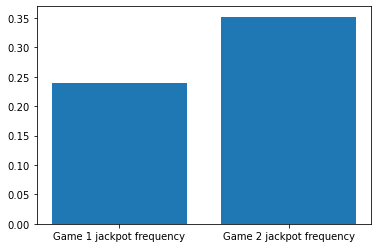

In [8]:
plt.bar(['Game 1 jackpot frequency','Game 2 jackpot frequency'],[g1jf,g2jf])

## A 6-sided die
### 1. Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.

In [9]:
fair_die1 = Die([1,2,3,4,5,6])
unfair_die1 = Die([1,2,3,4,5,6])
unfair_die1.change_w(6,5)
unfair_die1._die_df

,face,weight
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,5.0


In [10]:
unfair_die2 = Die([1,2,3,4,5,6])
unfair_die2.change_w(1,5)
unfair_die2._die_df

,face,weight
0,1,5.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


### 2. Play a game of 10000 rolls with 5 fair dice.

In [11]:
game1 = Game([fair_die1,fair_die1,fair_die1,fair_die1,fair_die1])
nrolls1 = 10000
game1.play(nrolls1)

### 3. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.

In [12]:
game2 = Game([unfair_die1,unfair_die1,unfair_die2,fair_die1,fair_die1])
nrolls2 = 10000
game2.play(nrolls2)

### 4. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

In [13]:
analyzer1 = Analyzer(game1)
analyzer2 = Analyzer(game2)

In [14]:
g1jf = analyzer1.jackpot()/nrolls1
g2jf = analyzer2.jackpot()/nrolls2
print("Game 1 jackpot frequency:",g1jf)
print("Game 2 Jackpot frequency:",g2jf)

Game 1 jackpot frequency: 0.0006
Game 2 Jackpot frequency: 0.0008


<BarContainer object of 2 artists>

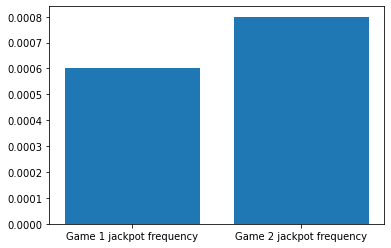

In [15]:
plt.bar(['Game 1 jackpot frequency','Game 2 jackpot frequency'],[g1jf,g2jf])

### 5. Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

In [16]:
game1frequent = analyzer1.combo().head(10)
game2frequent = analyzer2.combo().head(10)
labels1 = [str(x) for x in game1frequent.index]
labels2 = [str(x) for x in game2frequent.index]

/tmp/ipykernel_33245/2711478076.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels1,rotation=-90)


<BarContainer object of 10 artists>

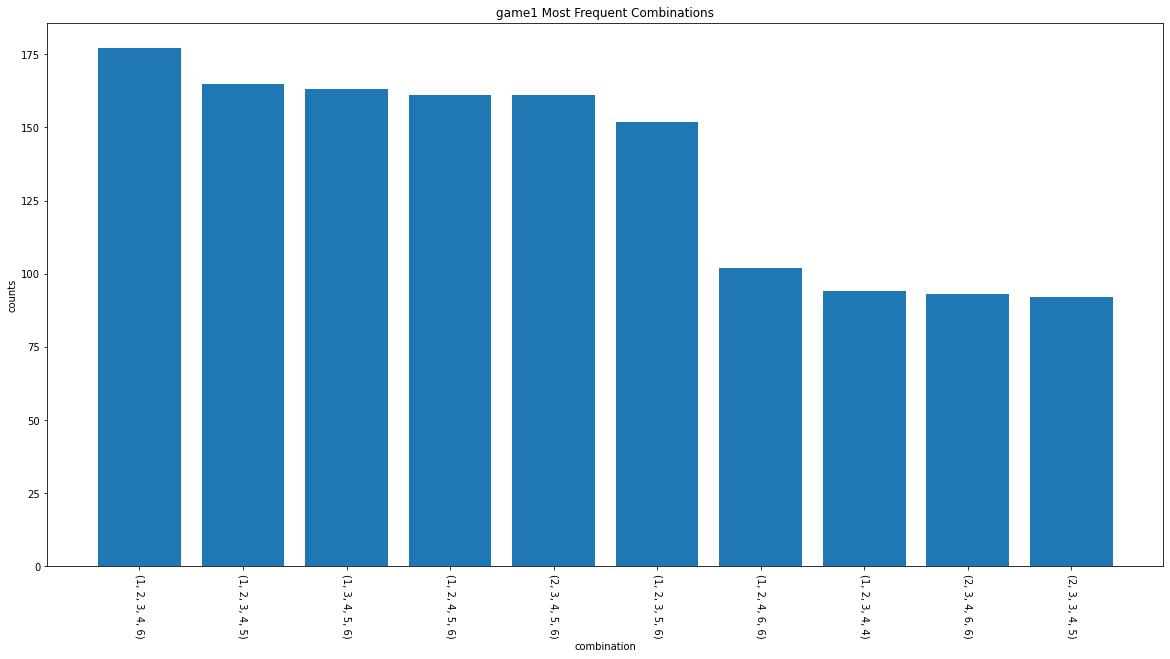

In [17]:
fig,ax = plt.subplots(figsize=(20,10))
ax.set_xticklabels(labels1,rotation=-90)
ax.set_title('game1 Most Frequent Combinations')
ax.set_xlabel('combination')
ax.set_ylabel('counts')
ax.bar(labels1,game1frequent.counts)

/tmp/ipykernel_33245/3509191893.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels1,rotation=-90)


<BarContainer object of 10 artists>

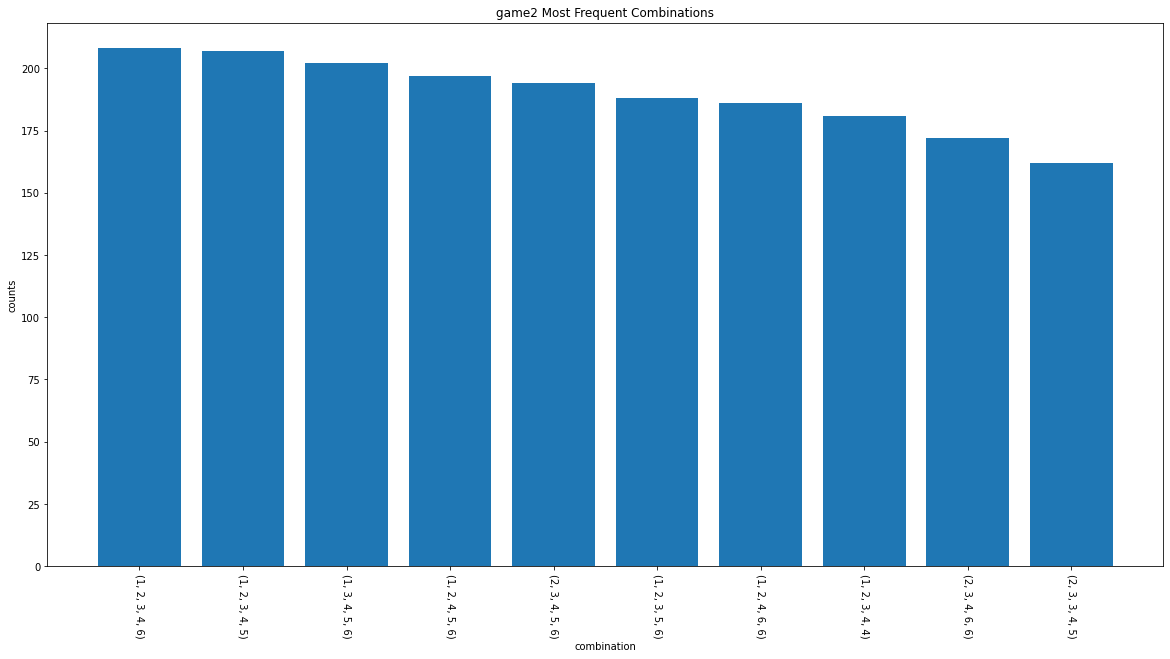

In [18]:
fig,ax = plt.subplots(figsize=(20,10))
ax.set_xticklabels(labels1,rotation=-90)
ax.set_title('game2 Most Frequent Combinations')
ax.set_xlabel('combination')
ax.set_ylabel('counts')
ax.bar(labels2,game2frequent.counts)

## Scenario 3: Letters of the Roman Alphabet
### 1. Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.

In [19]:
letters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
frequency = [8.4966,2.072,4.5388,3.3844,11.1607,1.8121,2.4705,3.0034,7.5448,0.1965,1.1016,5.4893,3.0129,6.6544,7.1635,3.1671,0.1962,7.5809,5.7351,6.9509,3.6308,1.0074,1.2899,0.2902,1.7779,0.2722]
die1 = Die(letters)
for i,face in enumerate(letters):
    weight = frequency[i]
    die1.change_w(face,weight)
die1._die_df

,face,weight
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,2.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


### 2. Play a game involving 5 of these dice with 1000 rolls.

In [74]:
game1 = Game(np.full(5,die1))
game1.play(1000)

### 3. How many combos can you that look like actual English words?
***NOTE: "combo" here should really be permutation, which make sense for words. So just compute these from the result data you get from the Game object.***

In [80]:
df = game1._df
df = df.T
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,N,T,M,I,P,O,E,R,R,U,...,E,S,N,M,T,L,C,D,T,A
1,H,O,I,I,U,T,E,E,H,I,...,I,E,T,R,O,C,D,E,E,G
2,R,U,R,N,Y,S,E,P,O,W,...,V,N,I,A,N,T,N,E,S,I
3,C,R,E,T,K,A,D,T,S,P,...,M,O,Y,A,N,C,S,U,I,P
4,D,L,T,N,A,O,D,P,I,A,...,E,L,W,O,T,C,O,D,T,O


In [90]:
game1combos = [''.join(list(df[x])).lower() for x in list(df.columns)]
realwords = list(pd.read_csv('five_letter_words.csv',header=None)[0])

In [93]:
realcombos = []
for combo in game1combos:
    if combo in realwords:
        realcombos.append(combo)
print(len(realcombos), "combos look like real English words.")
realcombos

2 combos look like real English words.


['heirs', 'smile']

### 4. Based on your eye count, what is the relative frequency of these words versus the rest?
***NOTE: You can do a few random sample to compute your estimate.***

In [98]:
random.choice(game1combos)

'turwc'

It looks like each of these word's frequency is 1/1000 based on our list size and their frequency.